In [1]:
import os
import sys
sys.path.append(os.pardir) 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Embedding, Dense, Input, Bidirectional, LSTM, Dropout, CuDNNLSTM
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

import pickle
import codecs
import csv
import struct

from numpy import genfromtxt

import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, LSTM, Dropout, CuDNNLSTM
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Data file path
Guryongpo_Swell_Data_Path = './Data/1.Guryongpo_Swell(14~17).csv'
Wolopo_Swell_Data_Path = './Data/2.Wolpo_Swell(15~17).csv'
Pohang_Weather_Data_Path = './Data/3.Pohang_Weather(14~17).csv'

In [3]:
# Data list
Guryongpo_Swell = []
Wolopo_Swell = []
Guryongpo_Swell_with_Weather = []
Wolopo_Swell_with_Weather = []

In [4]:
# string list 

# Only Weather
w = ['평균기온(°C)', '최저기온(°C)','최저기온 시각(hhmi)','최고기온(°C)',
      '최고기온 시각(hhmi)','강수 계속시간(hr)','일강수량(mm)','최대 순간 풍속(m/s)',
      '최대 순간 풍속 풍향(16방위)','최대 순간풍속 시각(hhmi)','최대 풍속(m/s)',
      '최대 풍속 풍향(16방위)','최대 풍속 시각(hhmi)','평균 풍속(m/s)','풍정합(100m)',
      '평균 이슬점온도(°C)','최소 상대습도(%)','최소 상대습도 시각(hhmi)',
      '평균 상대습도(%)','평균 증기압(hPa)','평균 현지기압(hPa)','최고 해면기압(hPa)',
      '최고 해면기압 시각(hhmi)','최저 해면기압(hPa)','최저 해면기압 시각(hhmi)',
      '평균 해면기압(hPa)','가조시간(hr)','합계 일조 시간(hr)','1시간 최다일사 시각(hhmi)',
      '1시간 최다일사량(MJ/m2)','합계 일사(MJ/m2)','평균 전운량(1/10)','평균 중하층운량(1/10)',
      '평균 지면온도(°C)','최저 초상온도(°C)','평균 5cm 지중온도(°C)','평균 10cm 지중온도(°C)',
      '평균 20cm 지중온도(°C)','평균 30cm 지중온도(°C)','0.5m 지중온도(°C)','1.0m 지중온도(°C)',
      '1.5m 지중온도(°C)','3.0m 지중온도(°C)','5.0m 지중온도(°C)','합계 대형증발량(mm)',
      '합계 소형증발량(mm)']
    
# Only Swell
o = ['평균 수온(°C)', '최고 수온(°C)', '최저 수온(°C)', '평균 유의 파고(m)',
     '평균 파고(m)', '최고 유의 파고(m)', '최고 최대 파고(m)','평균 파주기(sec)', '최고 파주기(sec)',]


# Guryongpo_Swell + Wolpo_Swell
m = ['G_평균 수온(°C)','W_평균 수온(°C)', 'G_최고 수온(°C)','W_최고 수온(°C)', 
     'G_최저 수온(°C)', 'W_최저 수온(°C)', 'G_평균 유의 파고(m)','W_평균 유의 파고(m)','G_평균 파고(m)',
     'W_평균 파고(m)', 'G_최고 유의 파고(m)','W_최고 유의 파고(m)', 'G_최고 최대 파고(m)','W_최고 최대 파고(m)',
     'G_평균 파주기(sec)','W_평균 파주기(sec)', 'G_최고 파주기(sec)', 'W_최고 파주기(sec)']

# Swell + Weather
c = np.concatenate([o,w], axis=0)

In [5]:
print(len(c))
print(len(m)/2)

55
9.0


In [6]:
# Data after merge
Column_Sum_Swell = []
Row_Sum_Swell = []

In [7]:
# Weather data list
Pohang_Weather = []

In [8]:
# Dataframe 
Guryongpo_DF = []
Guryongpo_Swell_with_Weather_DF =[]

Wolopo_DF = []
Wolopo_Swell_with_Weather_DF = []

Pohang_DF = []

In [9]:
# Dataframe 
Column_Sum_DF = []
Row_Sum_DF = []

In [10]:
# load csv file 
def loadData():   
    print("Data loading...")
    
    global Guryongpo_Swell
    global Wolopo_Swell
    global Pohang_Weather
    
    global Guryongpo_Swell_with_Weather
    global Wolopo_Swell_with_Weather
    
    
    global Guryongpo_DF
    global Guryongpo_Swell_with_Weather_DF
    
    global Wolopo_DF
    global Wolopo_Swell_with_Weather_DF
    
    global Pohang_DF
    
    # Read csv file from directory
    Guryongpo = genfromtxt(Guryongpo_Swell_Data_Path, delimiter=',' ,encoding='UTF8')
    Wolopo = genfromtxt(Wolopo_Swell_Data_Path, delimiter=',', encoding='UTF8')
    Pohang = genfromtxt(Pohang_Weather_Data_Path, delimiter=',', encoding='UTF8')
    
    
    # Remove colums and row
    Guryongpo_Swell = Guryongpo[1:,3:]
    Wolopo_Swell = Wolopo[1:,3:]
    Pohang_Weather = Pohang[1:,2:]
    
    
    # Convert string to float64
    Guryongpo_Swell.astype('float64')
    Wolopo_Swell.astype('float64')
    Pohang_Weather.astype('float64')
 
   
    # Fill NaN data to 0   
    Guryongpo_Swell[np.isnan(Guryongpo_Swell)] = 0
    Wolopo_Swell[np.isnan(Wolopo_Swell)] = 0
    Pohang_Weather[np.isnan(Pohang_Weather)] = 0

    
    # Guryongpo  - Wolopo
    dis = len(Guryongpo_Swell)- len(Wolopo_Swell)
    
    
    # Concatenate between swell and weather data
    Guryongpo_Swell_with_Weather = np.concatenate([Guryongpo_Swell,Pohang_Weather], axis=1)
    Wolopo_Swell_with_Weather = np.concatenate([Wolopo_Swell,Pohang_Weather[dis:]], axis=1)
    
     
    # Dataframe
    Guryongpo_DF = pd.DataFrame(Guryongpo_Swell, columns = o)
    Guryongpo_Swell_with_Weather_DF = pd.DataFrame(Guryongpo_Swell_with_Weather, columns = c)
    
    Wolopo_DF = pd.DataFrame(Wolopo_Swell, columns = o)
    Wolopo_Swell_with_Weather_DF = pd.DataFrame(Wolopo_Swell_with_Weather, columns = c)

    Pohang_DF = pd.DataFrame(Pohang_Weather, columns = w)

In [11]:
loadData()

Data loading...


In [12]:
print(Pohang_Weather.shape)

(1438, 46)


In [13]:
# 2015-09-25 부터 colum sum 
# 구룡포의 2014 데이터는 어떻게 할 것인지 보류 (2014 구룡포 데이터는 있지만 월포의 데이터가 없음)
# Data merge by column
def sumColumnData():
    print("process colum sum...")
    global Guryongpo_Swell
    global Wolopo_Swell
    global Column_Sum_Swell
    global Column_Sum_DF
    
    global c
    global m
    
    for i in range(len(Guryongpo_Swell)):
        dis = len(Guryongpo_Swell)- len(Wolopo_Swell)
        if(i< dis):
            continue
        else:
            data = []
            for colum in range(len(Guryongpo_Swell[0])):
                g = Guryongpo_Swell[i][colum]
                w = Wolopo_Swell[i-dis][colum]
                data.append(g)
                data.append(w)
            
            for w in range(len(Guryongpo_Swell[0]),len(Guryongpo_Swell_with_Weather[0])):    
                weather = Guryongpo_Swell_with_Weather[i][w]
                data.append(weather)
            Column_Sum_Swell.append(data)    
       
    t = np.concatenate([m,c[9:]])
    Column_Sum_Swell = np.array(Column_Sum_Swell)
    Column_Sum_DF = pd.DataFrame(Column_Sum_Swell, columns = t)

In [14]:
# Data merge by row
def sumRowData():
    global Guryongpo_Swell
    global Wolopo_Swell
    global Row_Sum_Swell
    global Row_Sum_DF
    global c
    
    for i in range(len(Guryongpo_Swell_with_Weather)):
        dis = len(Guryongpo_Swell_with_Weather)- len(Wolopo_Swell_with_Weather)
        if(i< dis):
            g = Guryongpo_Swell_with_Weather[i]
            Row_Sum_Swell.append(g)
        else:
            g = Guryongpo_Swell_with_Weather[i]
            w = Wolopo_Swell_with_Weather[i-dis]
            Row_Sum_Swell.append(g)
            Row_Sum_Swell.append(w)  
            
    Row_Sum_Swell = np.array(Row_Sum_Swell)
    Row_Sum_DF = pd.DataFrame(Row_Sum_Swell, columns = c)
    #

In [15]:
'''
global Guryongpo_Swell
global Pohang_Weather
global o # Swell data column string
global w # Weather data column string
'''
    
# data split by each column
target = []
weather = []

# 이거 index값을 기억해뒀다가 나중에 predict한값들로 데이터 채우기
delete_index = [] # nparray에서 delete할 index들의 list 

# 비어있는 값들  (x값은 있음, y값 비어있음)
empty_x = [] # y값 비어있는 곳 predict에 사용할 weather정보
empty_y = [] # weather 정보를 이용해 예측할 swell information의 컬럼 값집함

weather = np.array(np.copy(Pohang_Weather))
target = np.copy(Guryongpo_Swell[:,0])
target = np.reshape(target, (target.shape[0],1))


print("전 : " ,target.shape)
print("전 : " ,weather.shape)
for i in range(len(target)):
    if(target[i]==0):
        delete_index.append(i)
        empty_y.append(target[i])
        empty_x.append(weather[i])

        
# 값이 비어있는 row는 분리 - > 나중에 predict해서 채울수 있도록
# 분리되지 않은 데이터들을 가지고 train / validation / test 로 나눠서 LSTM 모델을 만든다
# 만든 모델을 가지고 비어있던 값들을 empty_x -> empty _y로 예측 해서 값을 채워넣는다.
target = np.delete(target, delete_index)
target = np.reshape(target, (target.shape[0],1))
weather = np.delete(weather, delete_index, 0)

empty_x = np.array(empty_x)
empty_y = np.array(empty_y)
#return columnData

print("후 : ",target.shape)
print("후 : ",weather.shape)

전 :  (1438, 1)
전 :  (1438, 46)
후 :  (1377, 1)
후 :  (1377, 46)


In [16]:
# path where all models are saved
BASE_PATH = './swellModel/'
if not os.path.exists(BASE_PATH):
    os.mkdir(BASE_PATH)

def create_checkpoint(model_name):
    # creates a subdirectory under `BASE_PATH`
    MODEL_PATH = os.path.join(BASE_PATH, model_name)
    if not os.path.exists(MODEL_PATH):
        os.mkdir(MODEL_PATH)
    
    return ModelCheckpoint(filepath=os.path.join(MODEL_PATH, '{epoch:02d}-{val_loss:.4f}.hdf5'),
                           monitor='val_loss',
                           verbose=1,
                           save_best_only=True)

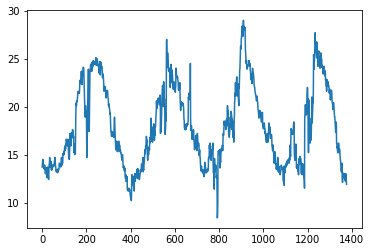

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plot_x = np.arange(len(target))
plot_y = target
plt.plot(plot_x, plot_y)
plt.show()

In [18]:
# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# 데이터 전처리
signal_data.shape
weather.shape

(1377, 46)

In [19]:
#def create_dataset(signal_data, look_back):
feature_num = weather.shape[1]

'''
def create_dataset(swell_data, weather_data, look_back):
    dataX, dataY = [], []
    for i in range(len(swell_data)-look_back):
        dataX.append(weather_data[i:(i+look_back), :])
        dataY.append(swell_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
'''

def create_dataset(swell_data, look_back):
    dataX, dataY = [], []
    for i in range(len(swell_data)-look_back):
        dataX.append(swell_data[i:(i+look_back), :])
        dataY.append(swell_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))


look_back = 14

# 데이터 분리
train_swell = target[0:int(len(target)*0.5)]
val_swell = target[int(len(target)*0.5):int(len(target)*0.75)]
test_swell = target[int(len(target)*0.75):]

train_weather = weather[0:int(len(weather)*0.5)]
val_weather = weather[int(len(weather)*0.5):int(len(weather)*0.75)]
test_weater = weather[int(len(weather)*0.75):]

In [20]:
print(len(train_swell)+len(val_swell)+len(test_swell))
print(len(target))
print("----------------------------")
print(len(train_weather)+len(val_weather)+len(test_weater))
print(len(weather))

1377
1377
----------------------------
1377
1377


In [21]:
train_swell[0:10]

array([[13.7],
       [14. ],
       [14.4],
       [14.5],
       [14.4],
       [14.1],
       [13.9],
       [13.8],
       [13.8],
       [13.5]])

In [22]:
# 데이터셋 생성
'''
x_train, y_train = create_dataset(train_swell,train_weather, look_back)
x_val, y_val = create_dataset(val_swell,val_weather, look_back)
x_test, y_test = create_dataset(test_swell,test_weater, look_back)
'''
x_train, y_train = create_dataset(train_swell, look_back)
x_val, y_val = create_dataset(val_swell,look_back)
x_test, y_test = create_dataset(test_swell, look_back)


# 체크포인트 생성,
checkpoint = create_checkpoint('lstm') 

In [23]:
#print(x_train[0])
print(y_train[0:10])


[13.1 13.  13.1 13.1 13.3 13.6 13.  12.6 13.  13.6]


In [24]:
int(len(target)*0.75)

1032

In [25]:
print(x_train.shape)

(674, 14, 1)


In [26]:
# 데이터셋 전처리
'''
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], x_val.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],x_test.shape[2]))
'''
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))


In [27]:
x_train[0]
y_train[0]

13.1

In [28]:
# 2. 모델 구성하기
'''
model = Sequential()
model.add(CuDNNLSTM(32, batch_input_shape=(1, look_back, feature_num), stateful=True, return_sequences=True))
model.add(Dropout(0.3))
model.add(CuDNNLSTM(32, batch_input_shape=(1, look_back, feature_num), stateful=True, return_sequences=True))
model.add(Dropout(0.3))      
model.add(CuDNNLSTM(32, batch_input_shape=(1, look_back, feature_num), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

'''
model = Sequential()
model.add(CuDNNLSTM(32, batch_input_shape=(1, look_back, 1), stateful=True, return_sequences=True))
model.add(Dropout(0.3))
model.add(CuDNNLSTM(32, batch_input_shape=(1, look_back, 1), stateful=True, return_sequences=True))
model.add(Dropout(0.3))      
model.add(CuDNNLSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

#model.load_weights('./swellModel/lstm/271-1.8620.hdf5')

# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')


# 4. 모델 학습시키기
custom_hist = CustomHistory()
custom_hist.init()

for i in range(500):
    model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, callbacks=[custom_hist, checkpoint], validation_data=(x_val, y_val))
    model.reset_states()

Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 10s 15ms/step - loss: 48.0905 - val_loss: 19.1074

Epoch 00001: val_loss improved from inf to 19.10741, saving model to ./swellModel/lstm\01-19.1074.hdf5
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 10ms/step - loss: 20.4068 - val_loss: 18.5528

Epoch 00001: val_loss improved from 19.10741 to 18.55282, saving model to ./swellModel/lstm\01-18.5528.hdf5
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 10ms/step - loss: 21.8281 - val_loss: 18.5589

Epoch 00001: val_loss did not improve from 18.55282
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 10ms/step - loss: 20.8596 - val_loss: 18.8963

Epoch 00001: val_loss did not improve from 18.55282
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [=======================

674/674 [==============================] - 6s 9ms/step - loss: 6.2759 - val_loss: 5.7492

Epoch 00001: val_loss did not improve from 5.19610
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 6s 9ms/step - loss: 6.0210 - val_loss: 5.4818

Epoch 00001: val_loss did not improve from 5.19610
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 10ms/step - loss: 6.6195 - val_loss: 5.5103

Epoch 00001: val_loss did not improve from 5.19610
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 10ms/step - loss: 6.2199 - val_loss: 4.7736

Epoch 00001: val_loss improved from 5.19610 to 4.77358, saving model to ./swellModel/lstm\01-4.7736.hdf5
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 6s 10ms/step - loss: 6.2959 - val_loss: 6.1872

Epoch 00001: val_loss did not improve from 4.77358
Train on 674 s

674/674 [==============================] - 7s 10ms/step - loss: 3.6042 - val_loss: 4.0442

Epoch 00001: val_loss did not improve from 2.27465
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 10ms/step - loss: 4.1633 - val_loss: 4.6587

Epoch 00001: val_loss did not improve from 2.27465
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 10ms/step - loss: 4.3955 - val_loss: 5.9839

Epoch 00001: val_loss did not improve from 2.27465
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 6s 10ms/step - loss: 4.2350 - val_loss: 4.9681

Epoch 00001: val_loss did not improve from 2.27465
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 10ms/step - loss: 4.2504 - val_loss: 4.4211

Epoch 00001: val_loss did not improve from 2.27465
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [=

674/674 [==============================] - 7s 11ms/step - loss: 2.5467 - val_loss: 2.3436

Epoch 00001: val_loss did not improve from 2.25363
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 10ms/step - loss: 2.6754 - val_loss: 2.5151

Epoch 00001: val_loss did not improve from 2.25363
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 11ms/step - loss: 2.6777 - val_loss: 2.1189

Epoch 00001: val_loss improved from 2.25363 to 2.11892, saving model to ./swellModel/lstm\01-2.1189.hdf5
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 10ms/step - loss: 2.8147 - val_loss: 1.9901

Epoch 00001: val_loss improved from 2.11892 to 1.99012, saving model to ./swellModel/lstm\01-1.9901.hdf5
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 10ms/step - loss: 2.5968 - val_loss: 1.7419

Epoch 000

674/674 [==============================] - 11s 17ms/step - loss: 2.2937 - val_loss: 2.7365

Epoch 00001: val_loss did not improve from 1.16651
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 9s 13ms/step - loss: 2.2639 - val_loss: 3.3090

Epoch 00001: val_loss did not improve from 1.16651
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 8s 11ms/step - loss: 2.2559 - val_loss: 3.4879

Epoch 00001: val_loss did not improve from 1.16651
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 11ms/step - loss: 2.2356 - val_loss: 3.2635

Epoch 00001: val_loss did not improve from 1.16651
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 10ms/step - loss: 2.0674 - val_loss: 3.9445

Epoch 00001: val_loss did not improve from 1.16651
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [


Epoch 00001: val_loss did not improve from 1.16651
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 10ms/step - loss: 1.8122 - val_loss: 2.9101

Epoch 00001: val_loss did not improve from 1.16651
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 10ms/step - loss: 1.8379 - val_loss: 2.5019

Epoch 00001: val_loss did not improve from 1.16651
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 10ms/step - loss: 1.4826 - val_loss: 2.5368

Epoch 00001: val_loss did not improve from 1.16651
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 10ms/step - loss: 1.6565 - val_loss: 2.6717

Epoch 00001: val_loss did not improve from 1.16651
Train on 674 samples, validate on 330 samples
Epoch 1/1
674/674 [==============================] - 7s 10ms/step - loss: 1.5967 - val_loss: 2.3012

Epoch 000

KeyboardInterrupt: 

In [ ]:
# 5. 학습과정 살펴보기
plt.plot(custom_hist.train_loss)
plt.plot(custom_hist.val_loss)
plt.ylim(0.0, 40)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, batch_size=1, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, batch_size=1, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

In [ ]:
print(x_test.shape)

In [ ]:
x_test[0]

In [ ]:
print(y_test.shape)

In [ ]:
# 7. 모델 사용하기
look_ahead = len(x_test)
xhat = x_test[1]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
 
   
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()

plt.show()

In [ ]:
print(empty_y.shape)
print(empty_x.shape)

In [ ]:
loadData()

In [ ]:
#Guryongpo_DF[:5]

In [ ]:
#Wolopo_DF[:5]

In [ ]:
sumColumnData()

In [ ]:
# 2015-9-25 ~
#Column_Sum_DF[:5]

In [ ]:
sumRowData()

In [ ]:
# 2014-01-01 ~
#Row_Sum_DF[:5]

In [ ]:
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

In [ ]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)